# **PLACEMENT PREDICTOR**

## FOUNDATION

In [6]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/content/placement.csv')

In [ ]:
data.head()

head function prints first 5 rows of dataset

In [5]:
data.shape

(100, 4)

shape is an attribute of dataframe

## **Preprocessing**

In [7]:
data = data.iloc[:,1:]

here the syntax is data.iloc[rows,columms]

In [8]:
data.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


##EDA - DEMONSTRATION

In [10]:
import matplotlib.pyplot as plt

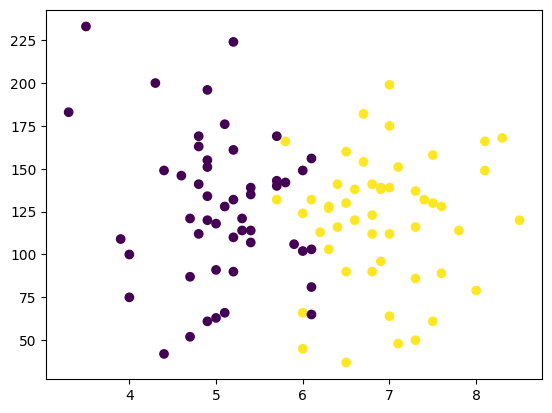

In [15]:
data_scatter = plt.scatter(data['cgpa'],data['iq'],c=data['placement'])

yellow - placement - 1

violet - placement - 0

## Extract input & output

In [18]:
x = data.iloc[:,0:2]
y = data.iloc[:,-1]

In [ ]:
x

In [ ]:
y

## Train-Test-Split

In [23]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [43]:
X_test

,cgpa,iq
97,6.7,182.0
38,6.5,160.0
52,7.0,175.0
36,5.7,140.0
64,7.0,64.0
77,7.3,50.0
8,6.1,156.0
83,7.5,130.0
29,7.0,112.0
74,6.7,154.0


In [ ]:
y_train

## SCALING

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)

In [46]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

## TRAIN MODEL

### Classification - Logistic_Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression()

### model training

In [48]:
lr.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred = lr.predict(X_test)

In [54]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [51]:
y_test

97    1
38    1
52    1
36    0
64    1
77    1
8     0
83    1
29    1
74    1
Name: placement, dtype: int64

In [55]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy = accuracy_score(y_test,y_pred)

In [ ]:
accuracy

In [63]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

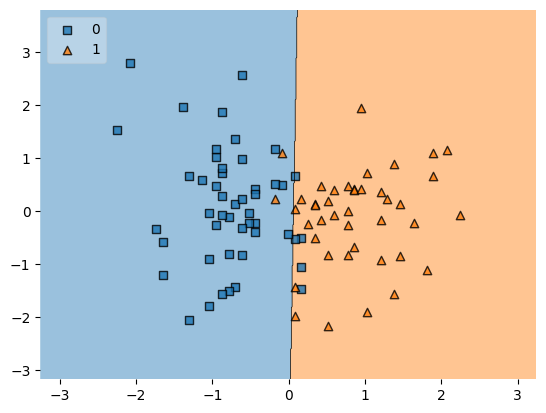

In [65]:
plot_decision_regions(X_train,y_train.values,clf=lr, legend=2)

## WEB

In [66]:
import pickle

In [68]:
pickle.dump(lr,open('placeAlgo.pkl','wb'))